In [3]:
import warnings
warnings.filterwarnings('ignore')

# Cross Val Intuition

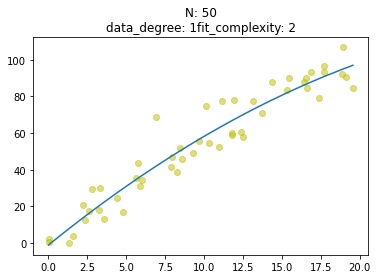

In [43]:
import numpy as np
import matplotlib.pyplot as plt

def plot_scatter_fit(num_samps=50, fit_complexity=1, degree=1):
    N = num_samps

    np.random.seed(seed=23)

    # gen rand x vals
    x = np.random.rand(N)*20

    # define polynomials
    if degree==1:
        y = 5*x + 3
    if degree==2:
        y = 3*x**2 + 5*x + 3
    if degree==3:
        y = -0.2*x**3 + 3*x**2 + 5*x + 3
    if degree==4:
        y = 0.006*x**4 + -0.2*x**3 + 3*x**2 + 5*x + 3

    
    # get scatter range
    y_val_range = np.ptp(y)

    # add normal noise
    y = [pt + np.random.normal(loc=0.0, scale=((1./10)*y_val_range)) for pt in y]


    # draw a line
    fit_complexity_ = fit_complexity
    regr = np.poly1d(np.polyfit(x, y, fit_complexity_))(np.unique(x))


    # plot
    plt.title(f'N: {N}\n' + \
              f'data_degree: {degree}' + \
              f'fit_complexity: {fit_complexity}'
              )

    plt.scatter(x, y, c='y', alpha=0.5)
    plt.plot(np.unique(x), regr)

    plt.show()


plot_scatter_fit(num_samps=50, fit_complexity=2, degree=1)

# ML Workflow

## 1. Import/Clean/Reshape Data

In [19]:
ls data

iris.data.txt


In [22]:
# load libraries
import pandas as pd

# define columns/features
names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

# load data
df = pd.read_csv('data/iris.data.txt', header=None, names=names)

df.tail(10);

In [26]:
columns = df.columns
columns;

In [27]:
# what are the different flowers?
df['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [28]:
len(df)

150

In [29]:
break_at = 10

for row in df['sepal_width']:
    print(row)

    break_at -= 1
    if break_at <= 0: break

3.5
3.0
3.2
3.1
3.6
3.9
3.4
3.4
2.9
3.1


## Plot Data

In [30]:
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

y = df[['class']]

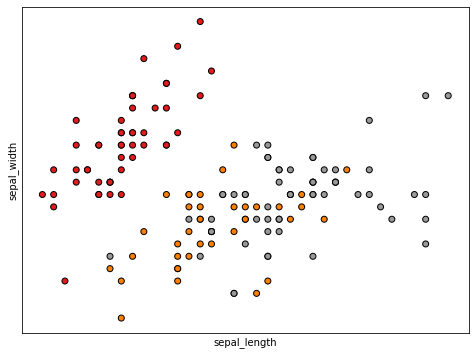

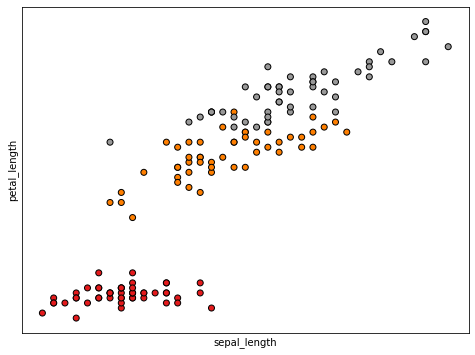

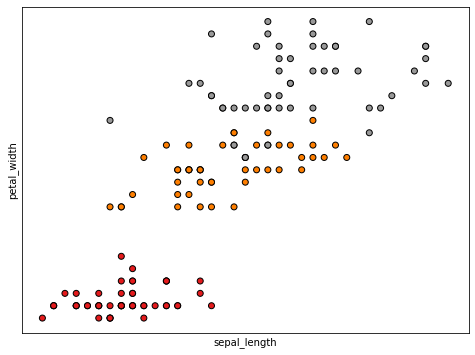

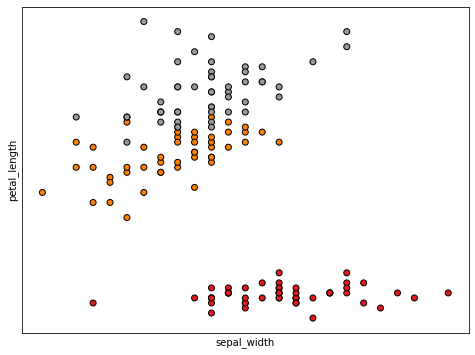

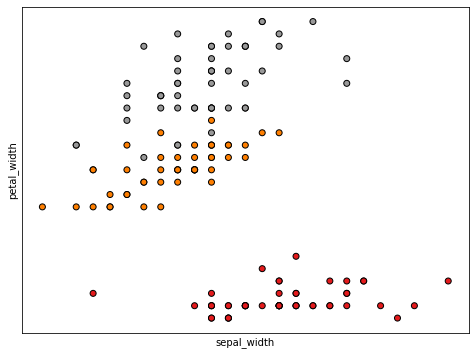

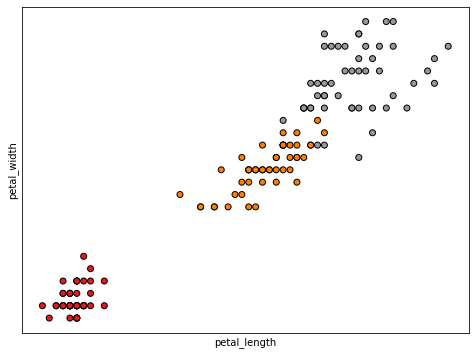

In [35]:
from sklearn.preprocessing import LabelEncoder

def plot_features(X_df, y_df, columns):
    le = LabelEncoder()
    y = le.fit_transform(y_df)

    # every pair of features
    built_pairs = []
    for col1 in columns[:-1]:
        for col2 in columns[:-1]:
            if col1 != col2 and (col1, col2) not in built_pairs and (col2, col1) not in built_pairs:
                tup = (col1, col2)
                built_pairs.append(tup)

    for pair in built_pairs:
        x_lab = pair[0]
        y_lab = pair[1]

        X = X_df[[x_lab, y_lab]].values

        x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
        y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    
        # built plot
        plt.figure(2, figsize=(8,6))
        plt.clf()

        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k')
        plt.xlabel(x_lab)
        plt.ylabel(y_lab)

        plt.xticks(())
        plt.yticks(())

        plt.show()

plot_features(X, y, columns)

# 2. Train/Test Split

In [38]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression # for you to try to implement


In [57]:
# least separable features
X = np.array(df[['sepal_length', 'sepal_width']])
y = np.array(df[['class']])

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=65)

# 3. Search for optimal hyperparams

In [58]:
# hold accuracy scores for vals of k neighbors
neighbors = list(range(1, 100))
cv_train_scores = []
cv_test_scores = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k, p=1)

    # fit the model
    knn.fit(X_train, y_train)

    # get preds on train
    y_train_pred = knn.predict(X_train)
    cv_train_scores.append(accuracy_score(y_train, y_train_pred))

    # get preds on test
    y_test_pred = knn.predict(X_test)
    cv_test_scores.append(accuracy_score(y_test, y_test_pred))

    

In [59]:
cv_train_scores;

In [60]:
cv_test_scores;

### Plot Results

Text(0.5, 1.0, 'Accuracy crossval, optimal: 33')

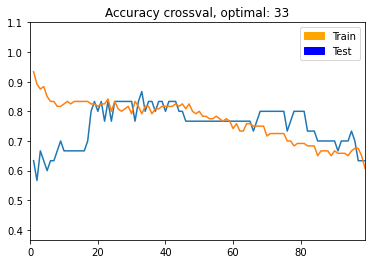

In [61]:
import matplotlib.patches as mpatches

test_max = cv_test_scores.index(max(cv_test_scores[::-1]))
opt_k = neighbors[test_max]

axes = plt.gca()
axes.set_xlim([0, len(neighbors)])
axes.set_ylim([min(cv_test_scores) - .2, 1.1])

orange_patch = mpatches.Patch(color='orange', label='Train')
blue_patch = mpatches.Patch(color='blue', label='Test')
plt.legend(handles=[orange_patch, blue_patch])

title = f'Accuracy crossval, optimal: {opt_k}'

axes.plot(neighbors, cv_test_scores, label='test scores')
axes.plot(neighbors, cv_train_scores, label='train scores')

plt.title(title)

# 4. Model Fit

In [62]:
knn = KNeighborsClassifier(n_neighbors=opt_k, p=1)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=33, p=1)

# 5. Model Predict

In [63]:
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

# 6. Report Metrics

In [65]:
print(f'Test Accuracy: {round(accuracy_score(y_test, y_test_pred), 3)}')

Test Accuracy: 0.867
